# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [93]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

55152


<Figure size 640x480 with 0 Axes>

## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [94]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [95]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'compartment_transcription')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\compartment_transcription\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\compartment_transcription\figures.


# Plotting parameters

In [96]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [97]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [98]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [99]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [100]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load AB assignment

Data below can be generated from notebook:

[4_higher_order_chromosome/4_ab_compartment_by_pm_majorType_assignment](../4_higher_order_chromosome/4_ab_compartment_by_pm_majorType_assignment.ipynb)

In [102]:
compartment_id_folder = r'L:\Shiwei\postanalysis_2024\v0\higher_order_chromosome\analysis'
group_ABs_id_df = pd.read_csv(os.path.join(compartment_id_folder,
                                         'AB_assignment_CG_by_pm_majorType.csv'), index_col=0)

group_ABs_id_df

,Astro,Endo,GABA,Gluta,Micro,Oligo
loci_name,,,,,,
chr1_3742742_3759944,B,A,B,B,B,B
chr1_6245958_6258969,A,A,B,B,B,B
chr1_8740008_8759916,B,B,B,B,B,B
chr1_9627926_9637875,A,A,B,B,A,B
chr1_9799472_9811359,A,A,B,B,A,A
...,...,...,...,...,...,...
chrX_163750534_163758706,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_166247682_166259932,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned
chrX_167157164_167167452,unassigned,unassigned,unassigned,unassigned,unassigned,unassigned


# Load RNA for annotation

Example can be generated from the notebook below

[0_locus_annotation/scripts/5_majorType_atac_and_rna_means_by_loci](../0_locus_annotation/scripts/5_majorType_atac_and_rna_means_by_loci.ipynb)

In [103]:
sel_class_list = ['Endo','Micro','Oligo','Astro','GABA','Gluta']

In [104]:
locus_info_folder = r'L:\Shiwei\postanalysis_2024\v0\locus_annotation\analysis'

import tqdm
ref_measure_dict_byGroup = {}

for _class in tqdm.tqdm(sel_class_list):
    _class_name = _class.replace(' ','_').replace('/','_')
    #print(_class_name)
    rna_atac_fname = os.path.join(locus_info_folder,f'majorType_{_class_name}_snATAC_snRNA_mean_by_loci.csv')
    if os.path.exists(rna_atac_fname):
        rna_atac_df = pd.read_csv(rna_atac_fname).set_index('loci_name', drop=True)
        ref_measure_dict_byGroup[_class] = rna_atac_df[[c for c in rna_atac_df.columns if 'mean' in c]]
        

ref_measure_dict_byGroup[_class].head()

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 109.66it/s]


,mean_rna_2X_2000kb,mean_ATAC_2X_2000kb
loci_name,,
chr1_3742742_3759944,21.494918,3.801971
chr1_6245958_6258969,11.687962,4.195687
chr1_8740008_8759916,31.259464,5.626522
chr1_9627926_9637875,38.436220,6.081351
chr1_9799472_9811359,38.436220,6.252073


# Plot ABcompartment summary

## AB summary across celltypes

In [105]:
res_summary_dict = {}
for _group in group_ABs_id_df.columns:
    _group_AB_id  = group_ABs_id_df[_group]
    res_summary_dict[_group]={'A': np.sum(_group_AB_id=='A'),'B': np.sum(_group_AB_id=='B')}
res_summary_df = pd.DataFrame(res_summary_dict).transpose()
res_summary_df['celltype'] = res_summary_df.index
res_summary_df['total'] = res_summary_df['A']+res_summary_df['B']
res_summary_df

,A,B,celltype,total
Astro,920,997,Astro,1917
Endo,1041,876,Endo,1917
GABA,864,1053,GABA,1917
Gluta,858,1059,Gluta,1917
Micro,897,1020,Micro,1917
Oligo,898,1019,Oligo,1917


## AB changes between celltype pairs

In [106]:
sorted_chroms = [f'chr{i}' for i in range(1,20)]
#sorted_chroms.append('chrX')
#sorted_chroms

In [107]:
_cellname_v2 = {'Gluta':'Exc. neurons', 
                'GABA':'Inh. neurons', 
                'Oligo':'Oligo-OPC', 
                'Astro':'Astro', 
                'Micro':'Micro', 
                'Endo':'Vascular', }

meta NOT subset; don't know how to subset; dropped


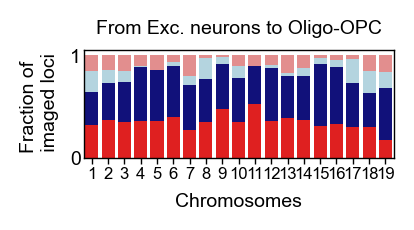

In [108]:
change_summary_dict = {}
_group_1 = 'Gluta'
_group_2 = 'Oligo'

AB_change_types = ['A to A','B to B','A to B','B to A',]
change_summary_dict={'A to A':[],'B to B':[],'A to B':[],'B to A':[],'chr':[]}

for chosen_chrom in sorted_chroms:
    group_ABs_id_df_chr = group_ABs_id_df[group_ABs_id_df.index.str.contains(f'{chosen_chrom}_')]
    
    _group_1_AB_chr = np.array(group_ABs_id_df_chr[_group_1].tolist())
    _group_2_AB_chr = np.array(group_ABs_id_df_chr[_group_2].tolist())
    total_AB_chr = np.sum((_group_1_AB_chr!='unassigned') & (_group_2_AB_chr!='unassigned'))
    change_summary_dict['A to A'].append(np.sum((_group_1_AB_chr=='A') & (_group_2_AB_chr=='A'))/total_AB_chr)
    change_summary_dict['B to B'].append(np.sum((_group_1_AB_chr=='B') & (_group_2_AB_chr=='B'))/total_AB_chr)
    change_summary_dict['A to B'].append(np.sum((_group_1_AB_chr=='A') & (_group_2_AB_chr=='B'))/total_AB_chr)
    change_summary_dict['B to A'].append(np.sum((_group_1_AB_chr=='B') & (_group_2_AB_chr=='A'))/total_AB_chr)
    change_summary_dict['chr'].append(chosen_chrom)

change_summary_df = pd.DataFrame(change_summary_dict)
                           
cum_change_summary_df = change_summary_df[AB_change_types].cumsum(axis=1)
cum_change_summary_df['chr'] = change_summary_df['chr']

import matplotlib.patches as mpatches

sel_change_summary_df = cum_change_summary_df.dropna()
sel_change_summary_df = sel_change_summary_df[sel_change_summary_df['chr']!='chrX']

fig, ax = plt.subplots(figsize=(2,0.7), dpi=200)

AB_change_types_colors = ['red','darkblue','lightblue','lightcoral']

for _col, _color in zip(AB_change_types[::-1], AB_change_types_colors[::-1]):
    bar_col = sns.barplot(x="chr", y=_col, data=sel_change_summary_df, color=_color)

# add legend
_bar_list = []
for _bar_id in range(len(AB_change_types_colors)):
    _bar = mpatches.Patch(color=AB_change_types_colors[_bar_id], label=AB_change_types[_bar_id])
    _bar_list.append(_bar)

#plt.legend(handles=_bar_list,fontsize=_font_size, loc='lower left',ncol=1)
#sns.move_legend(ax, "lower left", #bbox_to_anchor=(0.5, 1.15), 
                #ncol=2)


ax.tick_params('x', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                    width=_ticklabel_width, length=0,
                    pad=1, labelleft=True)

select_chroms_plot = [i.split('chr')[1] for i in sel_change_summary_df['chr'].tolist()]
#select_chroms_plot.append('X')
#ax.set_xticks(np.arange(0,len(select_chroms_plot)))
TickLabels = select_chroms_plot
ax.set_xticklabels(TickLabels,rotation=0,fontdict={'fontsize':_font_size-1})
    
ax.set_ylabel('Fraction of \n imaged loci', fontsize=_font_size)
ax.set_xlabel('Chromosomes', fontsize=_font_size)
ax.set_title(f'From {_cellname_v2[_group_1]} to {_cellname_v2[_group_2]}', fontsize=_font_size)
#ax.set_title(f'Compartment change \n from L5 IT to Oligo', fontsize=_font_size)
# show the graph
ax.grid(False)
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

_group_1 = _group_1.replace('/','_').replace(' ','_')
_group_2 = _group_2.replace('/','_').replace(' ','_')
plt.savefig(os.path.join(output_figure_folder,f'ABcompartment_change_from_{_group_1}_to_{_group_2}_bymajorType.pdf'),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)

plt.show()

meta NOT subset; don't know how to subset; dropped


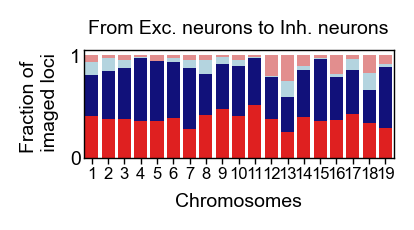

In [109]:
change_summary_dict = {}
_group_1 = 'Gluta'
_group_2 = 'GABA'


AB_change_types = ['A to A','B to B','A to B','B to A',]
change_summary_dict={'A to A':[],'B to B':[],'A to B':[],'B to A':[],'chr':[]}

for chosen_chrom in sorted_chroms:
    group_ABs_id_df_chr = group_ABs_id_df[group_ABs_id_df.index.str.contains(f'{chosen_chrom}_')]
    
    _group_1_AB_chr = np.array(group_ABs_id_df_chr[_group_1].tolist())
    _group_2_AB_chr = np.array(group_ABs_id_df_chr[_group_2].tolist())
    total_AB_chr = np.sum((_group_1_AB_chr!='unassigned') & (_group_2_AB_chr!='unassigned'))
    change_summary_dict['A to A'].append(np.sum((_group_1_AB_chr=='A') & (_group_2_AB_chr=='A'))/total_AB_chr)
    change_summary_dict['B to B'].append(np.sum((_group_1_AB_chr=='B') & (_group_2_AB_chr=='B'))/total_AB_chr)
    change_summary_dict['A to B'].append(np.sum((_group_1_AB_chr=='A') & (_group_2_AB_chr=='B'))/total_AB_chr)
    change_summary_dict['B to A'].append(np.sum((_group_1_AB_chr=='B') & (_group_2_AB_chr=='A'))/total_AB_chr)
    change_summary_dict['chr'].append(chosen_chrom)

change_summary_df = pd.DataFrame(change_summary_dict)
                           
cum_change_summary_df = change_summary_df[AB_change_types].cumsum(axis=1)
cum_change_summary_df['chr'] = change_summary_df['chr']

import matplotlib.patches as mpatches

sel_change_summary_df = cum_change_summary_df.dropna()
sel_change_summary_df = sel_change_summary_df[sel_change_summary_df['chr']!='chrX']

fig, ax = plt.subplots(figsize=(2,0.7), dpi=200)

AB_change_types_colors = ['red','darkblue','lightblue','lightcoral']

for _col, _color in zip(AB_change_types[::-1], AB_change_types_colors[::-1]):
    bar_col = sns.barplot(x="chr", y=_col, data=sel_change_summary_df, color=_color)

# add legend
_bar_list = []
for _bar_id in range(len(AB_change_types_colors)):
    _bar = mpatches.Patch(color=AB_change_types_colors[_bar_id], label=AB_change_types[_bar_id])
    _bar_list.append(_bar)

#plt.legend(handles=_bar_list,fontsize=_font_size, loc='lower left',ncol=1)
#sns.move_legend(ax, "lower left", #bbox_to_anchor=(0.5, 1.15), 
                #ncol=2)


ax.tick_params('x', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelbottom=True) # remove bottom ticklabels for _ax
ax.tick_params('y', labelsize=_font_size, 
                    width=_ticklabel_width, length=0,
                    pad=1, labelleft=True)

select_chroms_plot = [i.split('chr')[1] for i in sel_change_summary_df['chr'].tolist()]
#select_chroms_plot.append('X')
#ax.set_xticks(np.arange(0,len(select_chroms_plot)))
TickLabels = select_chroms_plot
ax.set_xticklabels(TickLabels,rotation=0,fontdict={'fontsize':_font_size-1})
    
ax.set_ylabel('Fraction of \n imaged loci', fontsize=_font_size)
ax.set_xlabel('Chromosomes', fontsize=_font_size)
ax.set_title(f'From {_cellname_v2[_group_1]} to {_cellname_v2[_group_2]}', fontsize=_font_size)
#ax.set_title(f'Compartment change \n from L5 IT to Oligo', fontsize=_font_size)
# show the graph
ax.grid(False)
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

_group_1 = _group_1.replace('/','_').replace(' ','_')
_group_2 = _group_2.replace('/','_').replace(' ','_')
plt.savefig(os.path.join(output_figure_folder,f'ABcompartment_change_from_{_group_1}_to_{_group_2}_bymajorType.pdf'),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)

plt.show()

# Summarize RNA and AB compartment

In [110]:
# process
AB_RNA_summary_dict = {'AB_compartment':[],'rna':[],
                    'loci':[],'celltype':[],'chr':[],}
for _group in ref_measure_dict_byGroup.keys():
    # AB id
    if _group in group_ABs_id_df.columns.tolist():
        AB_RNA_summary_dict['AB_compartment'].extend(group_ABs_id_df[_group].tolist())
    else:
        AB_RNA_summary_dict['AB_compartment'].extend([np.nan]*len(group_ABs_id_df))
    # other info            
    AB_RNA_summary_dict['loci'].extend(group_ABs_id_df.index.tolist())
    AB_RNA_summary_dict['celltype'].extend([_group]*len(group_ABs_id_df))
    AB_RNA_summary_dict['chr'].extend([i.split('_')[0] for i in group_ABs_id_df.index.tolist()])
    # get RNA and remove chrY
    rna_atac_df = ref_measure_dict_byGroup[_group]
    rna_atac_df = rna_atac_df[~rna_atac_df.index.str.contains('chrY_')]
    if len(rna_atac_df)==len(group_ABs_id_df):
        for _mode in ['rna', ]:
            AB_RNA_summary_dict[_mode].extend(rna_atac_df[f'mean_{_mode}_2X_2000kb'].tolist())
    else:
        for _mode in ['rna',]:
            AB_RNA_summary_dict[_mode].extend([np.nan]*len(group_ABs_id_df))

AB_RNA_summary_df = pd.DataFrame(AB_RNA_summary_dict)
AB_RNA_summary_df.head(10)

,AB_compartment,rna,loci,celltype,chr
0,A,6.086957,chr1_3742742_3759944,Endo,chr1
1,A,9.043478,chr1_6245958_6258969,Endo,chr1
2,B,5.434783,chr1_8740008_8759916,Endo,chr1
3,A,6.130435,chr1_9627926_9637875,Endo,chr1
4,A,6.130435,chr1_9799472_9811359,Endo,chr1
5,A,6.347826,chr1_11247744_11257616,Endo,chr1
6,B,2.391304,chr1_13741888_13757922,Endo,chr1
7,A,3.956522,chr1_16251322_16259969,Endo,chr1
8,B,0.304348,chr1_18749330_18759924,Endo,chr1
9,A,2.478261,chr1_20920666_20929358,Endo,chr1


## plot AB change with unnormlized transcription

In [111]:
sel_cell_groups = ['Oligo','GABA','Gluta',]
#sel_cell_groups = ['Micro', 'Endo','Oligo','Astro','Pvalb','L5 IT',]
from itertools import combinations
compare_pairs = list(combinations(sel_cell_groups,2))
compare_pairs

[('Oligo', 'GABA'), ('Oligo', 'Gluta'), ('GABA', 'Gluta')]

### process

In [112]:
AB_change_types = ['A to A','B to B','A to B','B to A',]
measure_mode = 'rna'
change_summary_dict = {'compartment_change':[], f'log2_{measure_mode}_change':[],'loci':[], 'celltype_change':[] }



for _group1, _group2 in compare_pairs:


    measure_mode = 'rna'
    AB_RNA_summary_df_g1 = AB_RNA_summary_df[AB_RNA_summary_df['celltype']==_group1]
    AB_RNA_summary_df_g2 = AB_RNA_summary_df[AB_RNA_summary_df['celltype']==_group2]

    change_summary_dict[f'log2_{measure_mode}_change'].extend(np.log2(np.array(AB_RNA_summary_df_g2[measure_mode])/
                                                                      np.array(AB_RNA_summary_df_g1[measure_mode])))
    change_summary_dict['compartment_change'].extend([f'{i} to {j}' for i, j in zip(list(AB_RNA_summary_df_g1['AB_compartment']),
                                                         list(AB_RNA_summary_df_g2['AB_compartment']))])
    change_summary_dict['loci'].extend(AB_RNA_summary_df_g1['loci'].tolist())
    change_summary_dict['celltype_change'].extend([f'{_group1} to {_group2}']*len(AB_RNA_summary_df_g1))

change_summary_df = pd.DataFrame(change_summary_dict)
change_summary_df = change_summary_df[change_summary_df['compartment_change'].isin(AB_change_types)]

def rename_comp_change (comp_change_type):
    if comp_change_type in ['A to A','B to B'] :
        return 'No change'
    else:
        return comp_change_type

change_summary_df['compartment_change_new'] =  change_summary_df['compartment_change'].map(lambda x: rename_comp_change(x))


change_summary_df.head()

C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_55152\3639261778.py:14: RuntimeWarning: divide by zero encountered in divide
  change_summary_dict[f'log2_{measure_mode}_change'].extend(np.log2(np.array(AB_RNA_summary_df_g2[measure_mode])/
C:\Users\shiwei\AppData\Local\Temp\3\ipykernel_55152\3639261778.py:14: RuntimeWarning: invalid value encountered in divide
  change_summary_dict[f'log2_{measure_mode}_change'].extend(np.log2(np.array(AB_RNA_summary_df_g2[measure_mode])/


,compartment_change,log2_rna_change,loci,celltype_change,compartment_change_new
0,B to B,3.401161,chr1_3742742_3759944,Oligo to GABA,No change
1,B to B,-0.680459,chr1_6245958_6258969,Oligo to GABA,No change
2,B to B,2.670436,chr1_8740008_8759916,Oligo to GABA,No change
3,B to B,3.069819,chr1_9627926_9637875,Oligo to GABA,No change
4,A to B,3.069819,chr1_9799472_9811359,Oligo to GABA,A to B


### plot figures

In [113]:
_cellname_v2 = {'Gluta':'Exc. neurons', 
                'GABA':'Inh. neurons', 
                'Oligo':'Oligo-OPC', 
                'Astro':'Astro', 
                'Micro':'Micro', 
                'Endo':'Vascular', }

GABA to Gluta :    F_onewayResult(statistic=25.859933586763827, pvalue=8.288255240172494e-12)
GABA to Gluta Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.304     0.000    -0.424    -0.185
 (0 - 2)     -0.488     0.000    -0.651    -0.324
 (1 - 0)      0.304     0.000     0.185     0.424
 (1 - 2)     -0.183     0.001    -0.305    -0.061
 (2 - 0)      0.488     0.000     0.324     0.651
 (2 - 1)      0.183     0.001     0.061     0.305



meta NOT subset; don't know how to subset; dropped


Oligo to GABA :    F_onewayResult(statistic=43.12142168773259, pvalue=4.822853545232508e-19)
Oligo to GABA Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.474     0.000    -0.627    -0.322
 (0 - 2)     -0.818     0.000    -1.030    -0.606
 (1 - 0)      0.474     0.000     0.322     0.627
 (1 - 2)     -0.344     0.000    -0.509    -0.179
 (2 - 0)      0.818     0.000     0.606     1.030
 (2 - 1)      0.344     0.000     0.179     0.509



meta NOT subset; don't know how to subset; dropped


Oligo to Gluta :    F_onewayResult(statistic=35.53655504479603, pvalue=7.031183850734864e-16)
Oligo to Gluta Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)     -0.433     0.000    -0.588    -0.279
 (0 - 2)     -0.757     0.000    -0.972    -0.541
 (1 - 0)      0.433     0.000     0.279     0.588
 (1 - 2)     -0.323     0.000    -0.492    -0.154
 (2 - 0)      0.757     0.000     0.541     0.972
 (2 - 1)      0.323     0.000     0.154     0.492



meta NOT subset; don't know how to subset; dropped


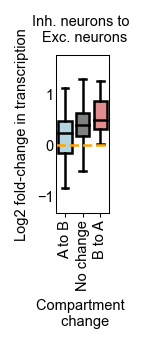

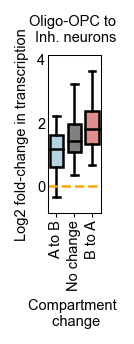

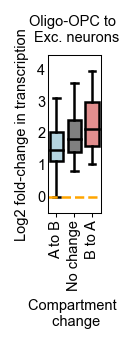

In [114]:
sel_celltype_change = np.unique(change_summary_df['celltype_change'])
import seaborn as sns
from scipy.stats import tukey_hsd
from scipy.stats import f_oneway
#sel_change_summary_df = change_summary_df[change_summary_df['compartment_change'].isin(['A to B','B to A'])]
sel_change_summary_df = change_summary_df.copy(deep=True)


AB_change_types_colors = {'B to A':'lightcoral','No change':'gray','A to B':'lightblue'}


#for _celltype_change in np.unique(change_summary_df['celltype_change']):
for _celltype_change in sel_celltype_change:    
    
    sub_sel_change_summary_df = sel_change_summary_df[sel_change_summary_df['celltype_change']==_celltype_change]
    #sns.set(style="whitegrid")
    fig,ax=plt.subplots(figsize=(_page_width/12,_page_width/12*3), dpi=150)
    sns.boxplot(data=sub_sel_change_summary_df, y ='log2_rna_change', x='compartment_change_new', 
                order = ['A to B', 
                         #'B to B', 'A to A', 
                         'No change',
                         'B to A',],
                palette = AB_change_types_colors,
                whis=[5, 95],
                width=0.75,
                ax=ax, fliersize=0,
                boxprops = {'edgecolor':'black'},
                medianprops = {'color':'black'},
                whiskerprops = {'color':'black'},
                capprops = {'color':'black'},
                
               )
    ymin = np.nanpercentile(sub_sel_change_summary_df[sub_sel_change_summary_df['compartment_change_new']=='A to B']
                            ['log2_rna_change'],5) - 0.5
    
    ymax = np.nanpercentile(sub_sel_change_summary_df[sub_sel_change_summary_df['compartment_change_new']=='B to A']
                            ['log2_rna_change'],95) + 0.5
    plt.ylim(ymin,ymax)
    
    ax.tick_params('x', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size, rotation=90,
                pad=1, labelbottom=True) # remove bottom ticklabels for _ax
    ax.tick_params('y', labelsize=_font_size, 
                        width=_ticklabel_width, length=0,
                        pad=1, labelleft=True)

    ax.set_ylabel('Log2 fold-change in transcription', fontsize=_font_size)
    ax.set_xlabel('Compartment \n change', fontsize=_font_size)
    _cls1 = _cellname_v2[_celltype_change.split(' to ')[0]]
    _cls2 = _cellname_v2[_celltype_change.split(' to ')[1]]
    ax.set_title(f'{_cls1} to \n {_cls2}', fontsize=_font_size)
    # show the graph
    ax.grid(False)
    ax.axhline(0, c='orange', linestyle='--')
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        
    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
        
        
    # perform stats
    stats_groups = []
    for AB_change_type in ['A to B', 'No change', 'B to A']:
        val_group = sub_sel_change_summary_df[sub_sel_change_summary_df['compartment_change_new']==AB_change_type]['log2_rna_change']
        val_group = np.array(val_group)
        stats_groups.append(val_group[np.isfinite(val_group)])
        
    res_oneway = f_oneway(stats_groups[0], stats_groups[1], stats_groups[2])
    print(_celltype_change, ':   ', res_oneway)
    if res_oneway[1]<0.05:
        res = tukey_hsd(stats_groups[0], stats_groups[1], stats_groups[2])
        print(_celltype_change, res)
    else:
        print('NS. Skip the correction.')
        
    _celltype_change = _celltype_change.replace('/','_').replace(' ','_')
    plt.savefig(os.path.join(output_figure_folder,f'ABcompartment_change_w_transcription_{_celltype_change}_unnorm_bymajorType.pdf'),
                    transparent=True, bbox_inches='tight', pad_inches=0.2, dpi=300)




## plot AB change with normalized transcription

### process

In [128]:
# init to save
heatmap_dict = {'A to B compartment change':None, 'B to A compartment change':None}


for _AB_change_type in heatmap_dict.keys():
    
    # remove chrX and chrY
    sel_AB_RNA_summary_df = AB_RNA_summary_df[~AB_RNA_summary_df['loci'].str.contains('chrY_')]
    sel_AB_RNA_summary_df = sel_AB_RNA_summary_df[~sel_AB_RNA_summary_df['loci'].str.contains('chrX_')]

    df_RNA_change = pd.DataFrame(index=sel_class_list, columns=sel_class_list)
    rna_log2_adj = 0.0001
    rna_col = 'rna'

    
    for i, ref_cls in enumerate(sel_class_list):
        ref_AB_RNA = sel_AB_RNA_summary_df[sel_AB_RNA_summary_df['celltype']==ref_cls]
        for j, target_cls in enumerate(sel_class_list):
            target_AB_RNA = sel_AB_RNA_summary_df[sel_AB_RNA_summary_df['celltype']==target_cls]

            if i!=j and _AB_change_type=='B to A compartment change': 
                changed_loci = np.array(ref_AB_RNA['AB_compartment']=='B') & np.array(target_AB_RNA['AB_compartment']=='A')
            elif  i!=j and _AB_change_type=='A to B compartment change': 
                changed_loci = np.array(ref_AB_RNA['AB_compartment']=='A') & np.array(target_AB_RNA['AB_compartment']=='B')
            else:
                df_RNA_change.loc[ref_cls, target_cls] = 0
                continue


            changes_RNA = (np.log2(target_AB_RNA.loc[changed_loci, rna_col].values+rna_log2_adj) - 
                                   np.log2(ref_AB_RNA.loc[changed_loci, rna_col].values+rna_log2_adj))

            unchanged = ~ changed_loci
            unchanged_vals = (np.log2(target_AB_RNA.loc[unchanged, rna_col].values+rna_log2_adj) -
                              np.log2(ref_AB_RNA.loc[unchanged, rna_col].values+rna_log2_adj))

            # normalize use unchanged loci
            df_RNA_change.loc[ref_cls, target_cls] = np.mean(changes_RNA) - np.mean(unchanged_vals)
            
    heatmap_dict[_AB_change_type] = df_RNA_change



In [130]:
heatmap_dict['B to A compartment change']

,Endo,Micro,Oligo,Astro,GABA,Gluta
Endo,0,0.260576,0.22737,0.147242,0.589087,0.292725
Micro,0.208271,0,0.271316,0.29738,0.468777,0.216673
Oligo,0.367162,0.461984,0,0.223307,0.398551,0.376935
Astro,0.262659,0.409235,0.372605,0,0.320707,0.341144
GABA,0.271777,0.593963,0.51315,0.348091,0,0.207728
Gluta,0.42807,0.584701,0.468371,0.491372,0.317241,0


In [131]:
heatmap_dict['A to B compartment change']

,Endo,Micro,Oligo,Astro,GABA,Gluta
Endo,0,-0.208271,-0.367162,-0.262659,-0.271777,-0.42807
Micro,-0.260576,0,-0.461984,-0.409235,-0.593963,-0.584701
Oligo,-0.22737,-0.271316,0,-0.372605,-0.51315,-0.468371
Astro,-0.147242,-0.29738,-0.223307,0,-0.348091,-0.491372
GABA,-0.589087,-0.468777,-0.398551,-0.320707,0,-0.317241
Gluta,-0.292725,-0.216673,-0.376935,-0.341144,-0.207728,0


### plot figures

In [132]:
_cellname_v2 = {'Gluta':'Exc. neurons', 
                'GABA':'Inh. neurons', 
                'Oligo':'Oligo-OPC', 
                'Astro':'Astro', 
                'Micro':'Micro', 
                'Endo':'Vascular', }

meta NOT subset; don't know how to subset; dropped


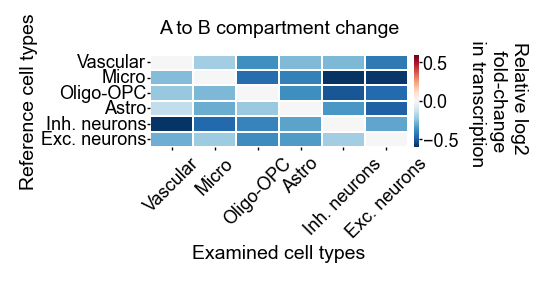

meta NOT subset; don't know how to subset; dropped


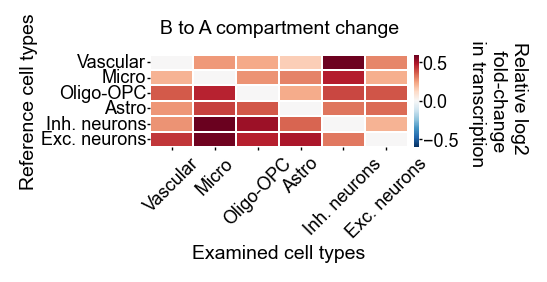

In [134]:
for _change_type, df_RNA_change in heatmap_dict.items():


    df_RNA_change = df_RNA_change.astype(float)
    df_RNA_change = df_RNA_change.rename(columns=_cellname_v2, index=_cellname_v2)


    fig, ax = plt.subplots(figsize=(2., 0.6), dpi=200)

    sns.heatmap(df_RNA_change, cmap='RdBu_r', ax=ax, #mask=(sel_df_RNA_change == 0),
                xticklabels=df_RNA_change.columns, 
                yticklabels=df_RNA_change.columns,
                cbar_kws={'label':'Relative log2 fold-change in transcription', 
                          "pad": 0.02}, linewidth=0.02,
                vmin=-0.6, vmax=0.6)

    cbar = plt.gca().collections[0].colorbar
    cbar.ax.tick_params(axis='y', labelsize=6.5, length=1, width=0.5, pad=0.5)
    cbar.ax.set_ylabel('Relative log2 \n fold-change \n in transcription', rotation=270, labelpad=25, fontsize=7,)

    #ax.xaxis.set_ticks_position('top')  # Move ticks to the top 
    ax.set_ylabel(f'Reference cell types', fontsize=_font_size, labelpad=1)
    ax.set_xlabel('Examined cell types', fontsize=_font_size, labelpad=1)
    ax.set_title(f'{_change_type}', fontsize=_font_size, y= 1.05)

    ax.tick_params(axis='y', labelsize=6.5, length=1, width=0.5, pad=0.5)
    ax.tick_params(axis='x', labelsize=6.5, length=1, width=0.5, pad=1.5, rotation = 45)


    [i[1].set_linewidth(0.5) for i in ax.spines.items()]
    plt.savefig(os.path.join(output_figure_folder, f"ABcompartment_change_w_transcription_summary_norm_bymajorType_{_change_type}.pdf"),
                    transparent=True, bbox_inches='tight', dpi=300)

    plt.show()

### merged into one matrix

In [136]:
merged_df_RNA_change

array([[ 0.        , -0.20827074, -0.36716226, -0.26265937, -0.27177703,
        -0.42807003],
       [ 0.20827074,  0.        , -0.46198432, -0.40923465, -0.59396342,
        -0.58470076],
       [ 0.36716226,  0.46198432,  0.        , -0.37260489, -0.51315047,
        -0.46837077],
       [ 0.26265937,  0.40923465,  0.37260489,  0.        , -0.34809124,
        -0.49137151],
       [ 0.27177703,  0.59396342,  0.51315047,  0.34809124,  0.        ,
        -0.31724075],
       [ 0.42807003,  0.58470076,  0.46837077,  0.49137151,  0.31724075,
         0.        ]])

meta NOT subset; don't know how to subset; dropped


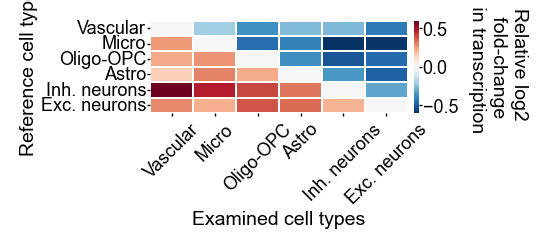

In [140]:
merged_df_RNA_change = np.triu(heatmap_dict['A to B compartment change']) + np.tril(heatmap_dict['B to A compartment change'].transpose())


merged_df_RNA_change = merged_df_RNA_change.astype(float)
#merged_df_RNA_change = merged_df_RNA_change.rename(columns=_cellname_v2, index=_cellname_v2)


fig, ax = plt.subplots(figsize=(2., 0.6), dpi=200)

sns.heatmap(merged_df_RNA_change, cmap='RdBu_r', ax=ax, #mask=(sel_df_RNA_change == 0),
            xticklabels=df_RNA_change.columns, 
            yticklabels=df_RNA_change.columns,
            cbar_kws={'label':'Relative log2 fold-change in transcription', 
                      "pad": 0.02}, linewidth=0.02,
            vmin=-0.6, vmax=0.6)

cbar = plt.gca().collections[0].colorbar
cbar.ax.tick_params(axis='y', labelsize=6.5, length=1, width=0.5, pad=0.5)
cbar.ax.set_ylabel('Relative log2 \n fold-change \n in transcription', rotation=270, labelpad=25, fontsize=7,)

#ax.xaxis.set_ticks_position('top')  # Move ticks to the top 
ax.set_ylabel(f'Reference cell types', fontsize=_font_size, labelpad=1)
ax.set_xlabel('Examined cell types', fontsize=_font_size, labelpad=1)
#ax.set_title(f'{_change_type}', fontsize=_font_size, y= 1.05)

ax.tick_params(axis='y', labelsize=6.5, length=1, width=0.5, pad=0.5)
ax.tick_params(axis='x', labelsize=6.5, length=1, width=0.5, pad=1.5, rotation = 45)


[i[1].set_linewidth(0.5) for i in ax.spines.items()]
plt.savefig(os.path.join(output_figure_folder, f"ABcompartment_change_w_transcription_summary_norm_bymajorType_merged.pdf"),
                transparent=True, bbox_inches='tight', dpi=300)

plt.show()